In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series
%matplotlib inline

In [3]:
combined_continuous_norm = pd.read_csv('combined_continuous_normalall.csv')
combined_pairplot = pd.read_csv('combined_pairplotall.csv')
combined_continuous_norm['realSentiment'] = combined_pairplot['realSentiment']
combined_continuous_norm.head()

,Unnamed: 0,AWSMixed,AWSNegative,AWSNeutral,AWSPositive,GCPmagnitude,GCPscore,IBMscore,Azurescore,realSentiment
0,1,-0.063659,-0.094527,-0.388041,0.520243,-0.148952,-0.11225,0.210059,0.250595,positive
1,2,-0.064006,-0.092341,0.386100,-0.256546,-0.065619,-0.04975,0.039393,0.191815,neutral
2,3,-0.065998,-0.089634,0.351884,-0.223833,-0.101333,-0.04975,-0.297846,-0.164039,neutral
3,4,-0.063469,-0.094165,0.271185,-0.140026,-0.113238,-0.04975,0.000489,0.148582,positive
4,5,-0.057415,0.196786,0.099759,-0.262626,-0.113238,-0.11225,0.053383,0.102990,neutral


In [4]:
combined_continuous_norm=combined_continuous_norm.drop(['Unnamed: 0'], axis=1)
combined_continuous_norm.head()

,AWSMixed,AWSNegative,AWSNeutral,AWSPositive,GCPmagnitude,GCPscore,IBMscore,Azurescore,realSentiment
0,-0.063659,-0.094527,-0.388041,0.520243,-0.148952,-0.11225,0.210059,0.250595,positive
1,-0.064006,-0.092341,0.386100,-0.256546,-0.065619,-0.04975,0.039393,0.191815,neutral
2,-0.065998,-0.089634,0.351884,-0.223833,-0.101333,-0.04975,-0.297846,-0.164039,neutral
3,-0.063469,-0.094165,0.271185,-0.140026,-0.113238,-0.04975,0.000489,0.148582,positive
4,-0.057415,0.196786,0.099759,-0.262626,-0.113238,-0.11225,0.053383,0.102990,neutral


In [5]:
combined_continuous_norm.describe()

,AWSMixed,AWSNegative,AWSNeutral,AWSPositive,GCPmagnitude,GCPscore,IBMscore,Azurescore
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.035283e-17,-1.038059e-17,-2.334244e-17,-1.893451e-17,-9.159340e-18,-1.154632e-17,4.224954e-16,-3.747003e-17
std,1.124273e-01,1.822356e-01,3.089389e-01,2.935154e-01,1.270298e-01,1.486928e-01,2.139603e-01,2.393366e-01
min,-6.877544e-02,-9.844110e-02,-5.889767e-01,-2.728663e-01,-1.489524e-01,-5.497500e-01,-7.844285e-01,-6.324581e-01
25%,-6.237028e-02,-9.604432e-02,-2.757634e-01,-2.402722e-01,-8.942858e-02,-1.122500e-01,-4.929083e-02,-1.640394e-01
50%,-4.416069e-02,-8.218817e-02,6.279459e-02,-1.244829e-01,-2.990476e-02,-4.975000e-02,7.148018e-02,-1.640394e-01
75%,1.214715e-02,-5.895371e-03,2.814085e-01,1.712414e-01,6.533333e-02,7.525001e-02,1.427119e-01,2.361176e-01
max,9.312246e-01,9.015589e-01,4.110233e-01,7.271337e-01,8.510476e-01,4.502500e-01,2.155715e-01,3.675419e-01


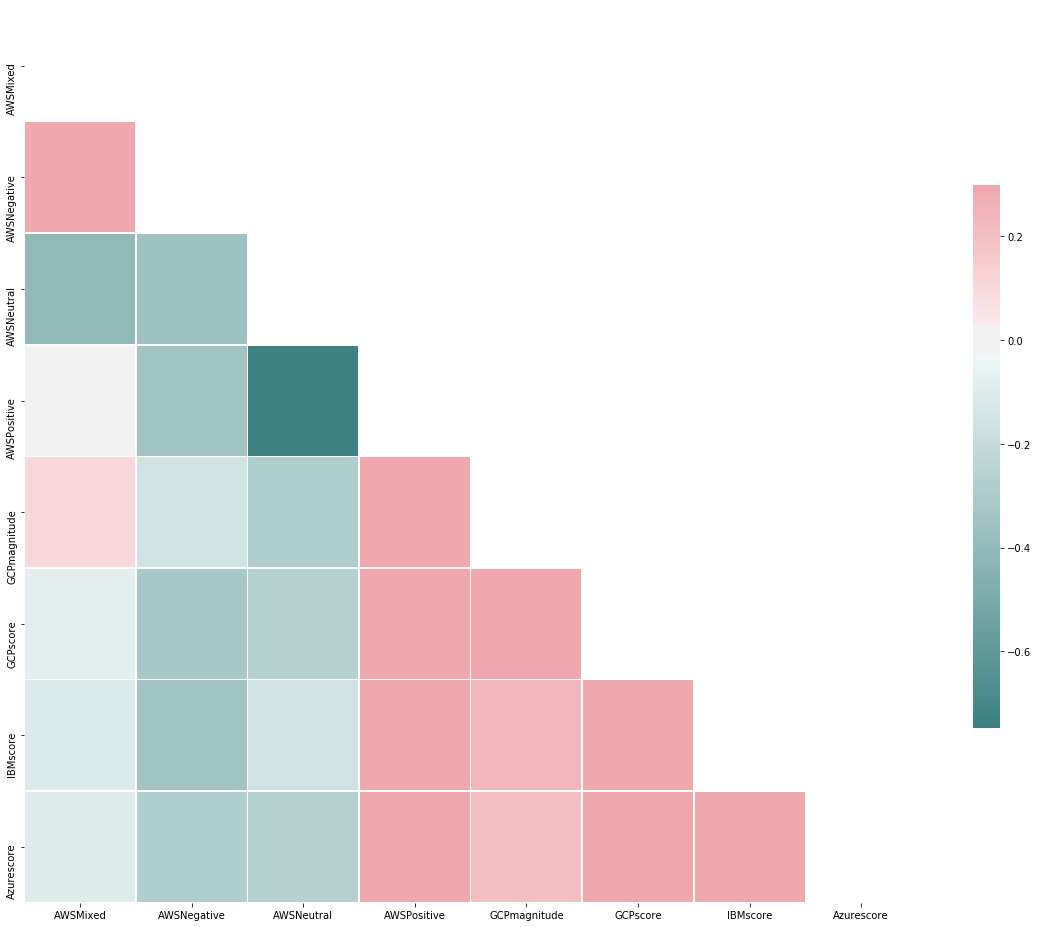

In [6]:
corr = combined_continuous_norm.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(190, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [7]:
median_priceAWSPositive	 = combined_continuous_norm.loc[:,"AWSPositive"].median()
print("median AWSPositive" ,median_priceAWSPositive)
median_priceAWSNegative = combined_continuous_norm.loc[:,"AWSNegative"].median()
print("median AWSNegative", median_priceAWSNegative)
median_priceGCPscore = combined_continuous_norm.loc[:,"GCPscore"].median()
print("median GCPscore",median_priceGCPscore)
median_priceIBMscore = combined_continuous_norm.loc[:,"IBMscore"].median()
print("median IBMscore", median_priceIBMscore)
median_priceAzurescore = combined_continuous_norm.loc[:,"Azurescore"].median()
print("median Azurescore", median_priceAzurescore)



median AWSPositive -0.1244828622713415
median AWSNegative -0.0821881693878838
median GCPscore -0.04975000196509067
median IBMscore 0.07148018402712844
median Azurescore -0.1640394255262684


Adding column to dataframe for holding categorical price value : pOSITIVE/NEGATIVE
All values < median are POSITIVE and Values >= median are NEGATIVE
(EXCEPT AWSNEGATIVE)

In [8]:
combined_continuous_norm['AWSPositive_SENTIMENT'] = combined_continuous_norm['AWSPositive'].apply(lambda x: 'positive' if x > median_priceAWSPositive else 'negative')
combined_continuous_norm['AWSNegative_SENTIMENT'] = combined_continuous_norm['AWSNegative'].apply(lambda x: 'negative' if x > median_priceAWSNegative else 'positive')
combined_continuous_norm['GCPscore_SENTIMENT'] = combined_continuous_norm['GCPscore'].apply(lambda x: 'positive' if x > median_priceGCPscore else 'negative')
combined_continuous_norm['IBMscore_SENTIMENT'] = combined_continuous_norm['IBMscore'].apply(lambda x: 'positive' if x > median_priceIBMscore else 'negative')
combined_continuous_norm['Azurescore_SENTIMENT'] = combined_continuous_norm['Azurescore'].apply(lambda x: 'positive' if x > median_priceAzurescore else 'negative')
combined_continuous_norm.head()


,AWSMixed,AWSNegative,AWSNeutral,AWSPositive,GCPmagnitude,GCPscore,IBMscore,Azurescore,realSentiment,AWSPositive_SENTIMENT,AWSNegative_SENTIMENT,GCPscore_SENTIMENT,IBMscore_SENTIMENT,Azurescore_SENTIMENT
0,-0.063659,-0.094527,-0.388041,0.520243,-0.148952,-0.11225,0.210059,0.250595,positive,positive,positive,negative,positive,positive
1,-0.064006,-0.092341,0.386100,-0.256546,-0.065619,-0.04975,0.039393,0.191815,neutral,negative,positive,negative,negative,positive
2,-0.065998,-0.089634,0.351884,-0.223833,-0.101333,-0.04975,-0.297846,-0.164039,neutral,negative,positive,negative,negative,negative
3,-0.063469,-0.094165,0.271185,-0.140026,-0.113238,-0.04975,0.000489,0.148582,positive,negative,positive,negative,negative,positive
4,-0.057415,0.196786,0.099759,-0.262626,-0.113238,-0.11225,0.053383,0.102990,neutral,negative,negative,negative,negative,positive


In [9]:
from sklearn.metrics import confusion_matrix


In [10]:
# This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

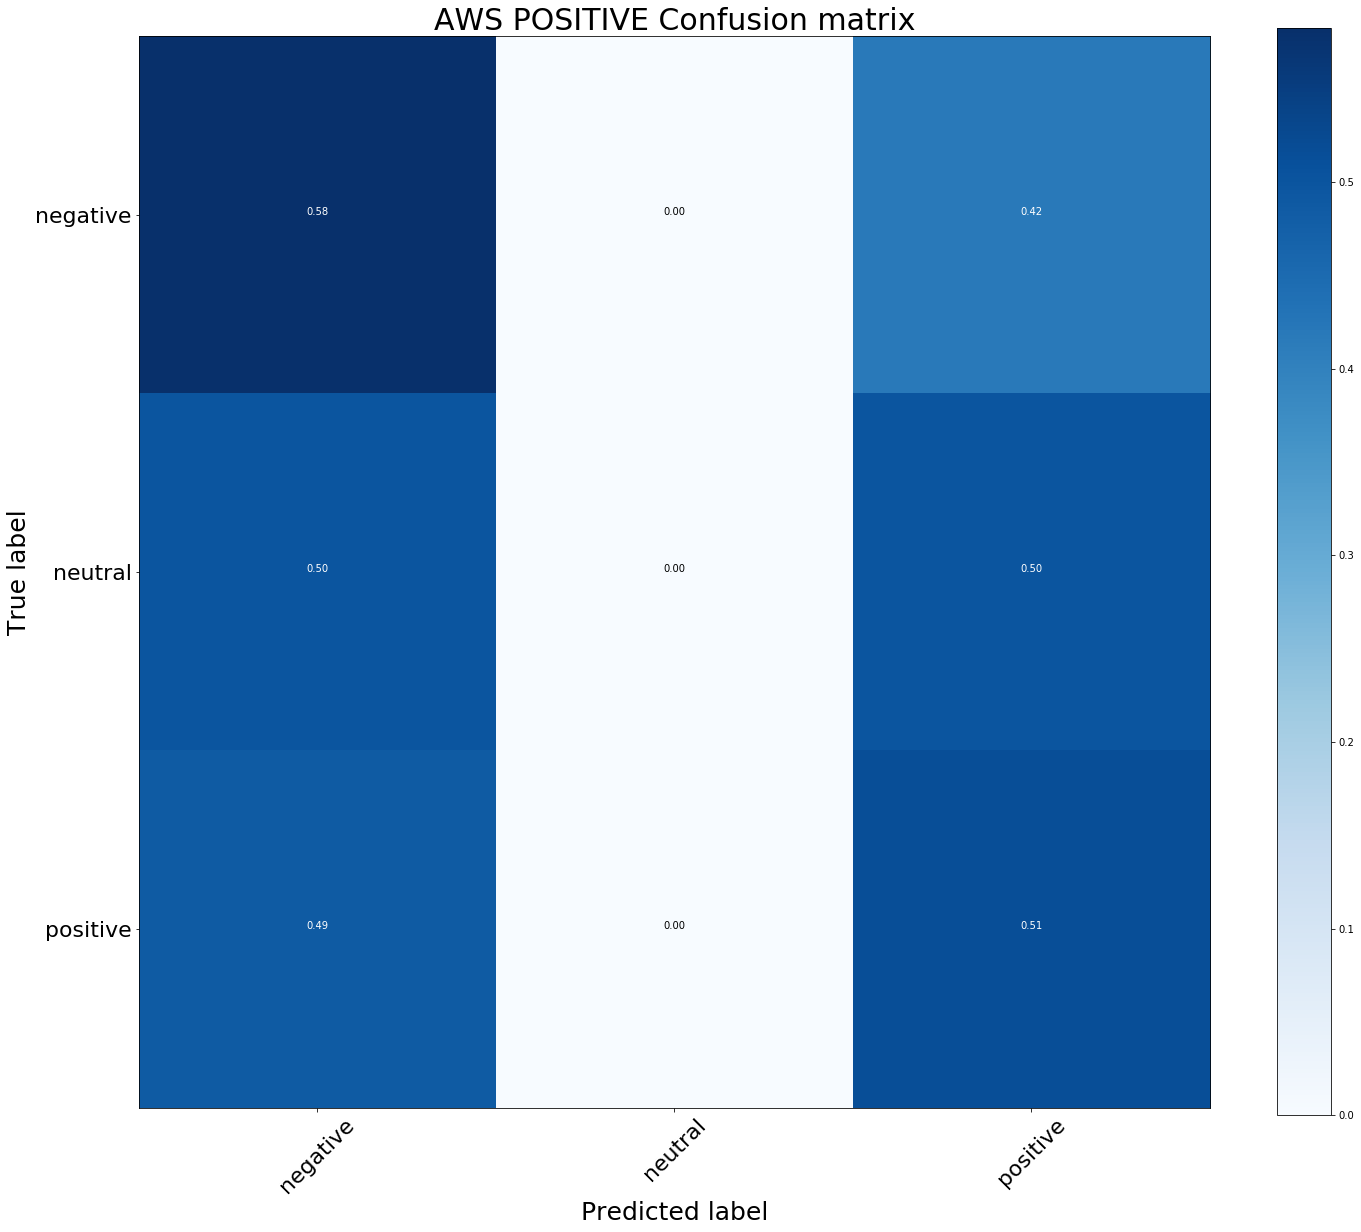

In [11]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
import itertools

train_tags = combined_continuous_norm['realSentiment'][:128]
encoder = LabelEncoder()
encoder.fit(train_tags)

text_labels = encoder.classes_ 

cnf_matrix = confusion_matrix(combined_continuous_norm['realSentiment'], combined_continuous_norm['AWSPositive_SENTIMENT'])
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="AWS POSITIVE Confusion matrix")
plt.show()


In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(combined_continuous_norm['realSentiment'], combined_continuous_norm['AWSPositive_SENTIMENT'])


0.325

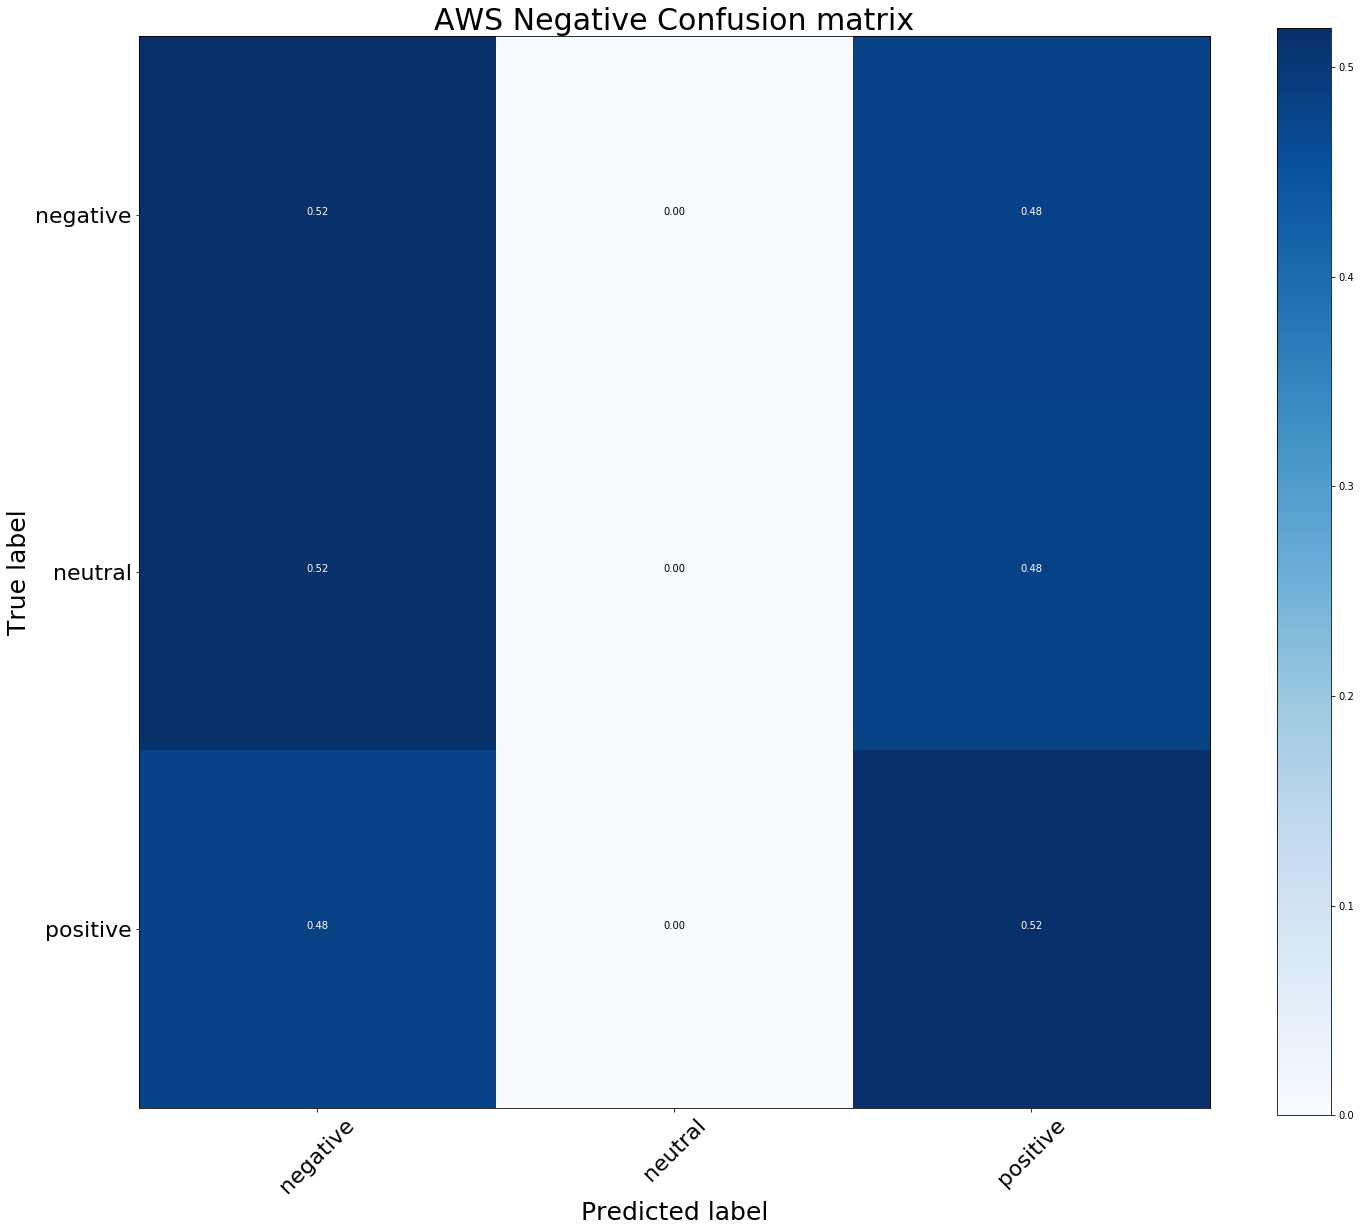

In [13]:
cnf_matrix = confusion_matrix(combined_continuous_norm['realSentiment'], combined_continuous_norm['AWSNegative_SENTIMENT'])
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="AWS Negative Confusion matrix")
plt.show()


In [14]:
accuracy_score(combined_continuous_norm['realSentiment'], combined_continuous_norm['AWSNegative_SENTIMENT'])


0.32

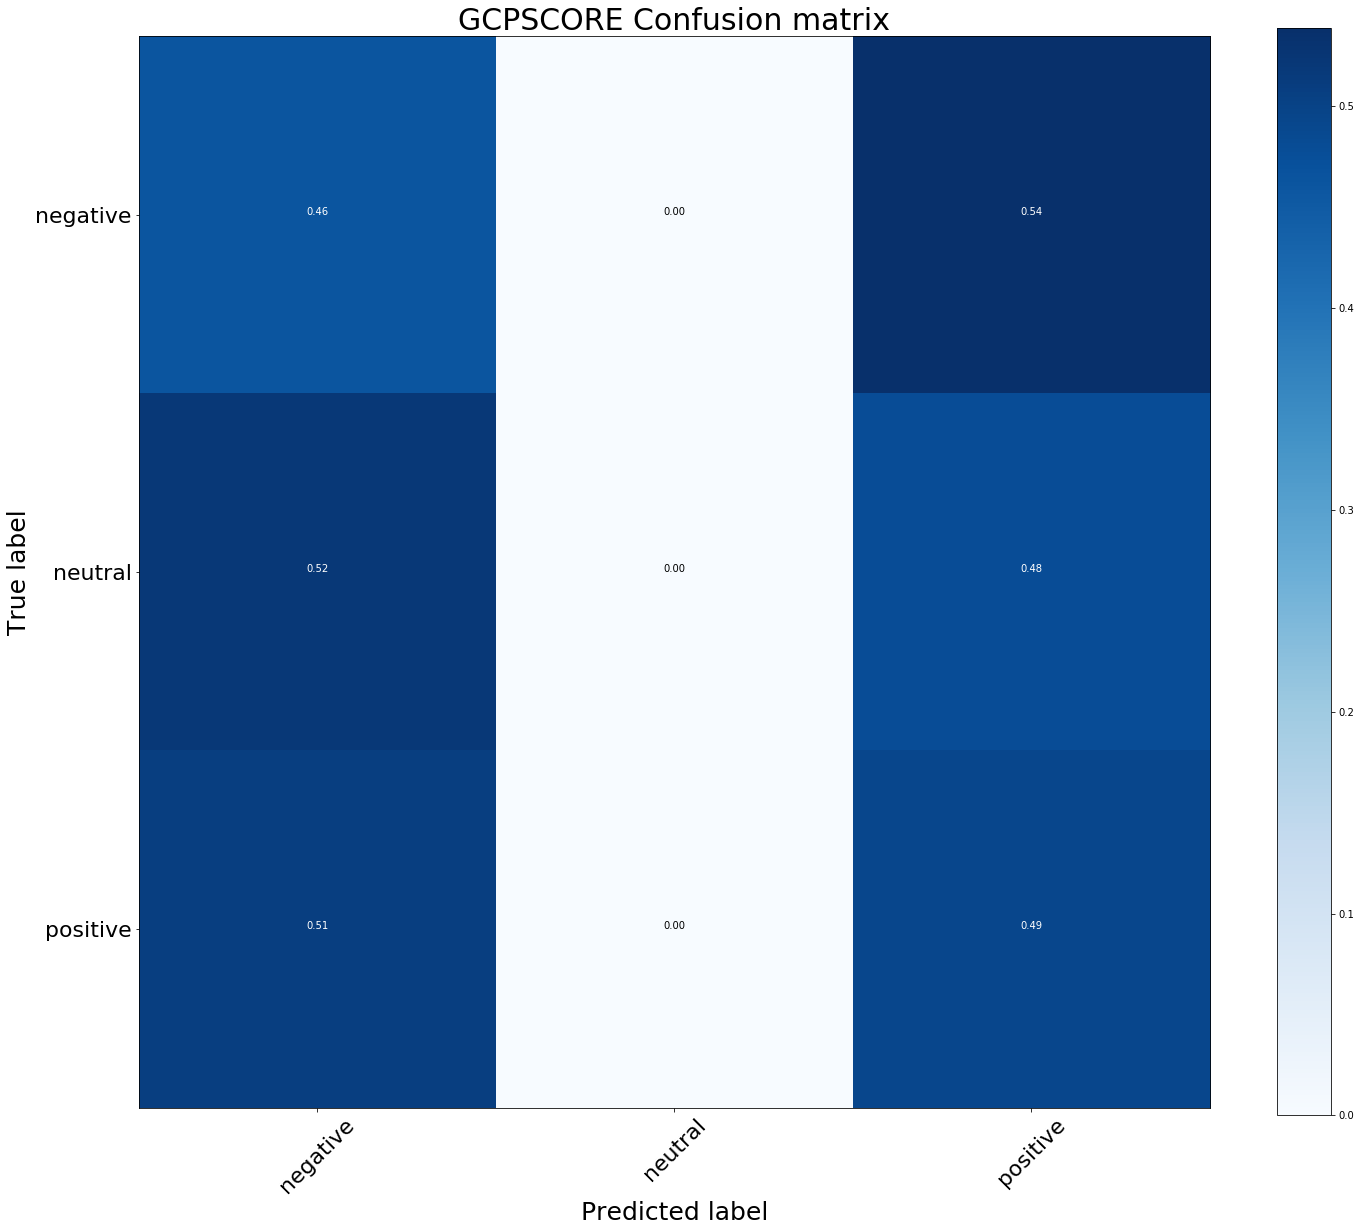

In [15]:
cnf_matrix = confusion_matrix(combined_continuous_norm['realSentiment'], combined_continuous_norm['GCPscore_SENTIMENT'])
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="GCPSCORE Confusion matrix")
plt.show()


In [16]:
accuracy_score(combined_continuous_norm['realSentiment'], combined_continuous_norm['GCPscore_SENTIMENT'])


0.302

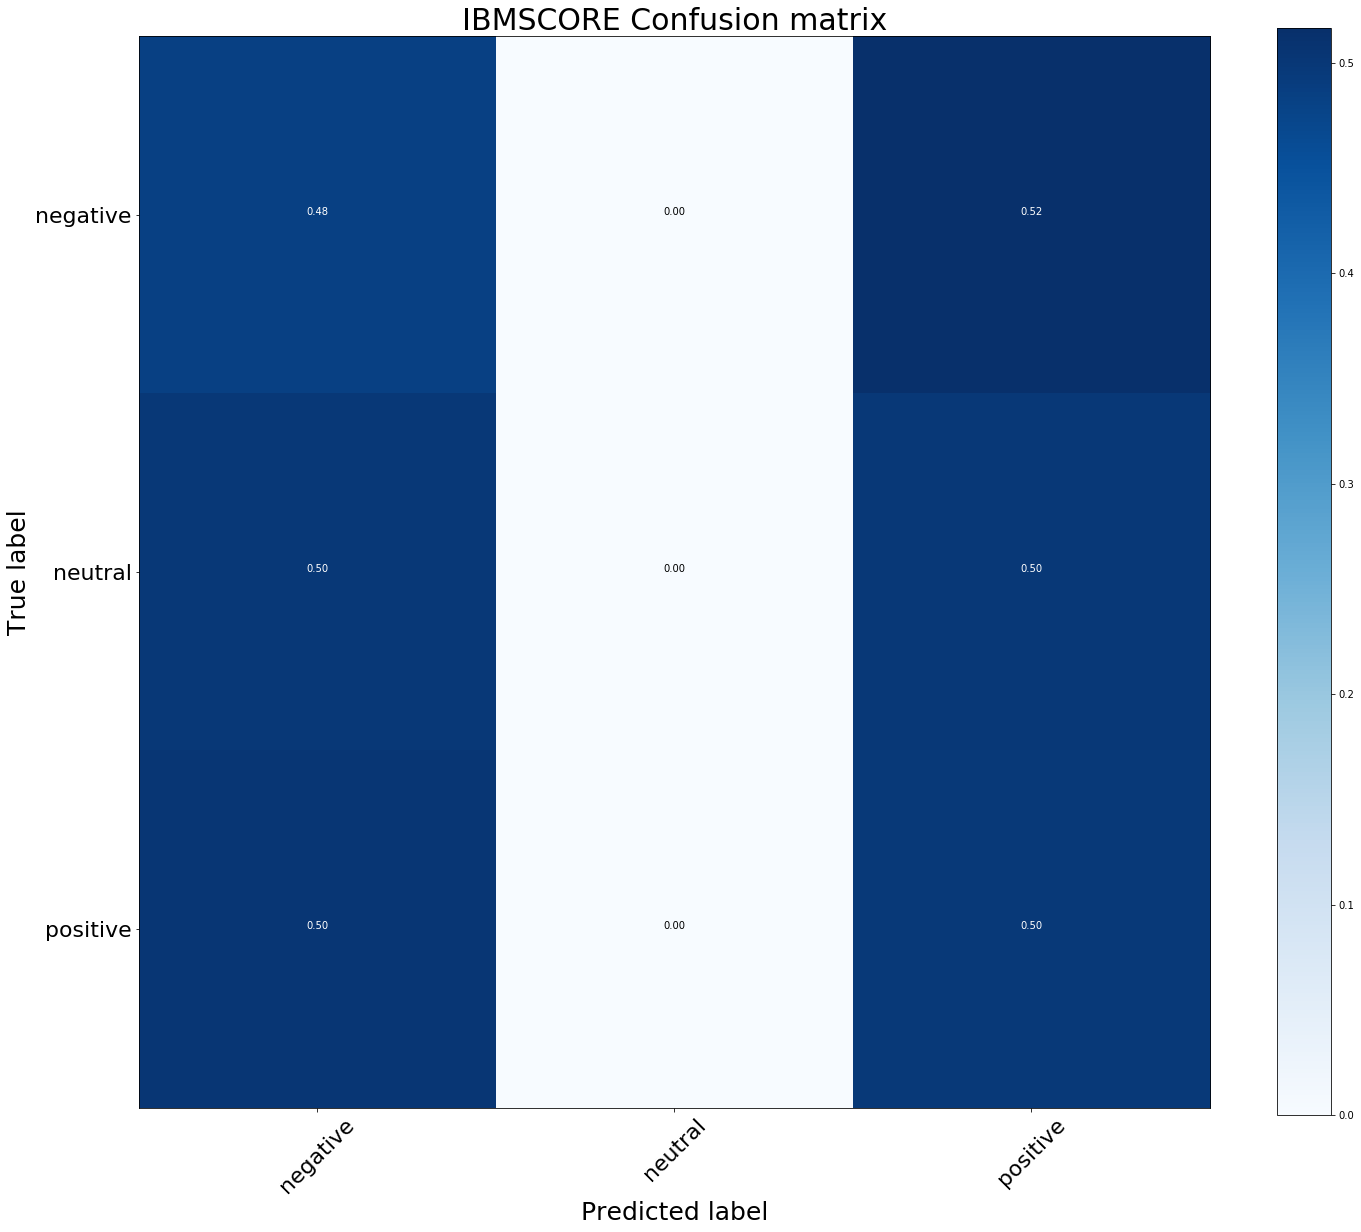

In [17]:
cnf_matrix = confusion_matrix(combined_continuous_norm['realSentiment'], combined_continuous_norm['IBMscore_SENTIMENT'])
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="IBMSCORE Confusion matrix")
plt.show()


In [18]:
accuracy_score(combined_continuous_norm['realSentiment'], combined_continuous_norm['IBMscore_SENTIMENT'])


0.307

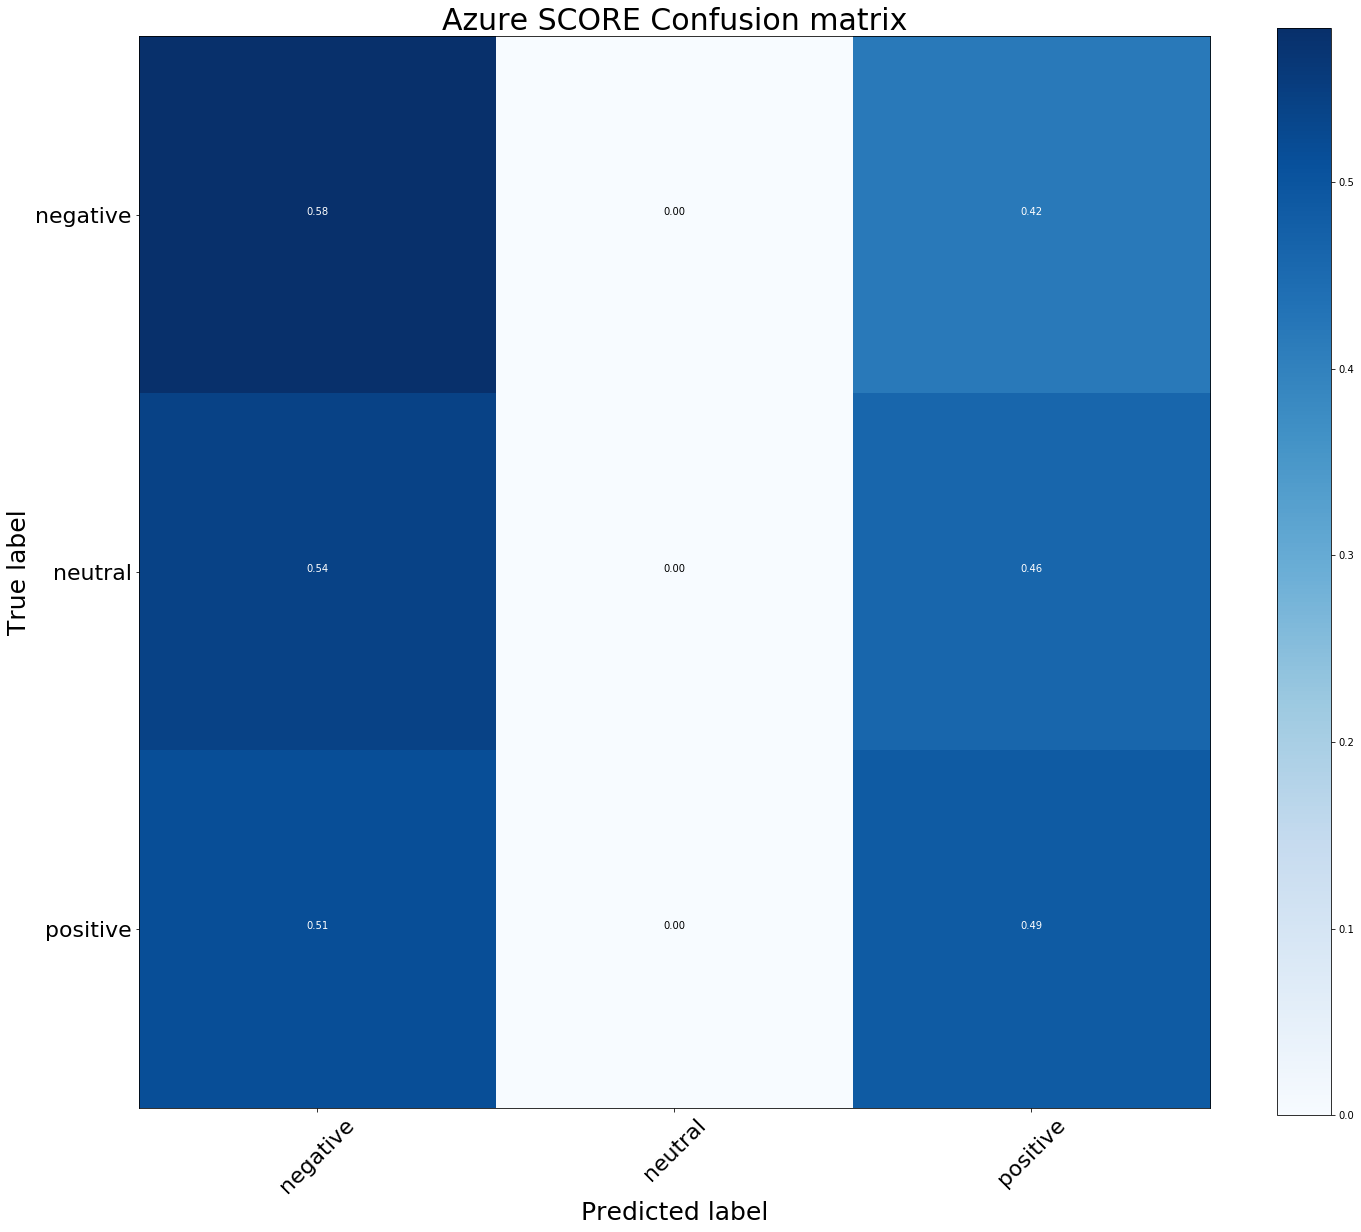

In [19]:
cnf_matrix = confusion_matrix(combined_continuous_norm['realSentiment'], combined_continuous_norm['Azurescore_SENTIMENT'])
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Azure SCORE Confusion matrix")
plt.show()


In [20]:
accuracy_score(combined_continuous_norm['realSentiment'], combined_continuous_norm['Azurescore_SENTIMENT'])


0.31

## Random Forest Classifier


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
combined_continuous_norm=combined_continuous_norm[combined_continuous_norm.realSentiment != 'neutral']
combined_continuous_norm.head()

,AWSMixed,AWSNegative,AWSNeutral,AWSPositive,GCPmagnitude,GCPscore,IBMscore,Azurescore,realSentiment,AWSPositive_SENTIMENT,AWSNegative_SENTIMENT,GCPscore_SENTIMENT,IBMscore_SENTIMENT,Azurescore_SENTIMENT
0,-0.063659,-0.094527,-0.388041,0.520243,-0.148952,-0.11225,0.210059,0.250595,positive,positive,positive,negative,positive,positive
3,-0.063469,-0.094165,0.271185,-0.140026,-0.113238,-0.04975,0.000489,0.148582,positive,negative,positive,negative,negative,positive
5,-0.067346,-0.095087,0.399877,-0.265628,-0.006095,-0.11225,-0.078320,-0.164039,positive,negative,positive,negative,negative,negative
6,-0.066475,-0.096543,0.339734,-0.204491,-0.137048,-0.11225,0.211264,-0.164039,positive,negative,positive,negative,positive,negative
8,-0.068492,-0.096375,0.408857,-0.272655,-0.041810,-0.17475,-0.563144,-0.164039,positive,negative,positive,negative,negative,negative


In [23]:
combined_continuous_norm['realSentiment'] = combined_continuous_norm['realSentiment'].apply(lambda x: 1 if x == 'positive' else 0)
combined_continuous_norm.head()

,AWSMixed,AWSNegative,AWSNeutral,AWSPositive,GCPmagnitude,GCPscore,IBMscore,Azurescore,realSentiment,AWSPositive_SENTIMENT,AWSNegative_SENTIMENT,GCPscore_SENTIMENT,IBMscore_SENTIMENT,Azurescore_SENTIMENT
0,-0.063659,-0.094527,-0.388041,0.520243,-0.148952,-0.11225,0.210059,0.250595,1,positive,positive,negative,positive,positive
3,-0.063469,-0.094165,0.271185,-0.140026,-0.113238,-0.04975,0.000489,0.148582,1,negative,positive,negative,negative,positive
5,-0.067346,-0.095087,0.399877,-0.265628,-0.006095,-0.11225,-0.078320,-0.164039,1,negative,positive,negative,negative,negative
6,-0.066475,-0.096543,0.339734,-0.204491,-0.137048,-0.11225,0.211264,-0.164039,1,negative,positive,negative,positive,negative
8,-0.068492,-0.096375,0.408857,-0.272655,-0.041810,-0.17475,-0.563144,-0.164039,1,negative,positive,negative,negative,negative


In [24]:
combined_continuous_norm=pd.get_dummies(combined_continuous_norm)

In [25]:
combined_continuous_norm.head()

,AWSMixed,AWSNegative,AWSNeutral,AWSPositive,GCPmagnitude,GCPscore,IBMscore,Azurescore,realSentiment,AWSPositive_SENTIMENT_negative,AWSPositive_SENTIMENT_positive,AWSNegative_SENTIMENT_negative,AWSNegative_SENTIMENT_positive,GCPscore_SENTIMENT_negative,GCPscore_SENTIMENT_positive,IBMscore_SENTIMENT_negative,IBMscore_SENTIMENT_positive,Azurescore_SENTIMENT_negative,Azurescore_SENTIMENT_positive
0,-0.063659,-0.094527,-0.388041,0.520243,-0.148952,-0.11225,0.210059,0.250595,1,0,1,0,1,1,0,0,1,0,1
3,-0.063469,-0.094165,0.271185,-0.140026,-0.113238,-0.04975,0.000489,0.148582,1,1,0,0,1,1,0,1,0,0,1
5,-0.067346,-0.095087,0.399877,-0.265628,-0.006095,-0.11225,-0.078320,-0.164039,1,1,0,0,1,1,0,1,0,1,0
6,-0.066475,-0.096543,0.339734,-0.204491,-0.137048,-0.11225,0.211264,-0.164039,1,1,0,0,1,1,0,0,1,1,0
8,-0.068492,-0.096375,0.408857,-0.272655,-0.041810,-0.17475,-0.563144,-0.164039,1,1,0,0,1,1,0,1,0,1,0


In [26]:
combined_continuous_norm.columns

Index(['AWSMixed', 'AWSNegative', 'AWSNeutral', 'AWSPositive', 'GCPmagnitude',
       'GCPscore', 'IBMscore', 'Azurescore', 'realSentiment',
       'AWSPositive_SENTIMENT_negative', 'AWSPositive_SENTIMENT_positive',
       'AWSNegative_SENTIMENT_negative', 'AWSNegative_SENTIMENT_positive',
       'GCPscore_SENTIMENT_negative', 'GCPscore_SENTIMENT_positive',
       'IBMscore_SENTIMENT_negative', 'IBMscore_SENTIMENT_positive',
       'Azurescore_SENTIMENT_negative', 'Azurescore_SENTIMENT_positive'],
      dtype='object')

In [27]:
from sklearn.model_selection import train_test_split

X=combined_continuous_norm[['AWSMixed', 'AWSNegative', 'AWSNeutral', 'AWSPositive', 'GCPmagnitude',
       'GCPscore', 'IBMscore', 'Azurescore', 
       'AWSPositive_SENTIMENT_negative', 'AWSPositive_SENTIMENT_positive',
       'AWSNegative_SENTIMENT_negative', 'AWSNegative_SENTIMENT_positive',
       'GCPscore_SENTIMENT_negative', 'GCPscore_SENTIMENT_positive',
       'IBMscore_SENTIMENT_negative', 'IBMscore_SENTIMENT_positive',
       'Azurescore_SENTIMENT_negative', 'Azurescore_SENTIMENT_positive']]  # Features

y=combined_continuous_norm['realSentiment']  # Labels
       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [28]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


In [29]:
accuracy_score(y_test, y_pred)


0.8279569892473119

In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


In [32]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf_base = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf_base, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
clf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   16.4s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 57, 105, 152, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [33]:
clf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 2}

### Evaluate Random Search

In [34]:
## Common Classification algorithm evaluator. It returns the roc_auc
from sklearn.metrics import roc_curve, auc
def evaluate(model, X_train,y_train, X_test, y_test):
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    #print(roc)
    return roc_auc

In [35]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)

In [36]:
best_random = clf_random.best_estimator_

In [37]:
print('ROC for base model : ' + str(evaluate(base_model,X_train,y_train, X_test, y_test)))
print('ROC for best model : ' + str(evaluate(best_random,X_train,y_train, X_test, y_test)))

ROC for base model : 0.5012820512820513
ROC for best model : 0.5


### Grid Search with Cross Validation

In [38]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [3,5,7],
    'n_estimators': [10, 20, 30,15]
}
# Create a based model
clf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [39]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    1.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_features': ['auto'], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [3, 5, 7], 'n_estimators': [10, 20, 30, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [40]:
grid_search.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 15}

In [41]:
best_grid = grid_search.best_estimator_

In [42]:
print('ROC for best grid search model : ' + str(evaluate(best_grid,X_train,y_train, X_test, y_test)))

ROC for best grid search model : 0.5


### Now lets implement XGBoost (eXtreme Gradient Boosting) 

I’ll consider only tree booster here because it always outperforms the linear booster and thus the later is rarely used.

In [43]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [44]:
# fit model on training data
xgBoostClassifierModel = XGBClassifier()
xgBoostClassifierModel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [45]:
# make predictions for test data
y_pred = xgBoostClassifierModel.predict(X_test)
predictions = [round(value) for value in y_pred]

In [46]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.33%


In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: -0.433305 using {'n_estimators': 50}
-0.433305 (0.046961) with: {'n_estimators': 50}
-0.452280 (0.068675) with: {'n_estimators': 100}
-0.468617 (0.085306) with: {'n_estimators': 150}
-0.489789 (0.099925) with: {'n_estimators': 200}
-0.513392 (0.119787) with: {'n_estimators': 250}
-0.533756 (0.133459) with: {'n_estimators': 300}
-0.551362 (0.140688) with: {'n_estimators': 350}


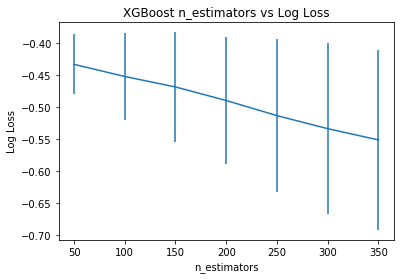

In [48]:
model = XGBClassifier()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators.png')

In [50]:
model = XGBClassifier()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best: -0.417095 using {'max_depth': 1}
-0.417095 (0.031009) with: {'max_depth': 1}
-0.452280 (0.068675) with: {'max_depth': 3}
-0.482601 (0.102453) with: {'max_depth': 5}
-0.512507 (0.119877) with: {'max_depth': 7}
-0.518529 (0.114404) with: {'max_depth': 9}


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.8s finished
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


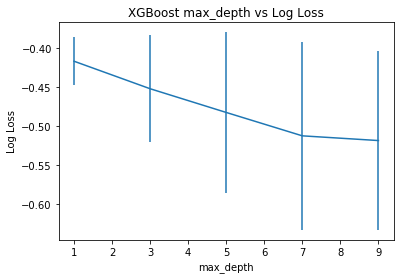

In [51]:
# plot
plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost max_depth vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')
plt.savefig('max_depth.png')

In [52]:
# grid search
model = XGBClassifier()
n_estimators = [350, 300, 250, 400]
max_depth = [6, 7, 8, 9]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


[6, 7, 8, 9]
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   18.9s finished
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: -0.599548 using {'max_depth': 6, 'n_estimators': 250}
-0.628115 (0.179952) with: {'max_depth': 6, 'n_estimators': 350}
-0.616064 (0.175983) with: {'max_depth': 6, 'n_estimators': 300}
-0.599548 (0.170635) with: {'max_depth': 6, 'n_estimators': 250}
-0.636972 (0.183954) with: {'max_depth': 6, 'n_estimators': 400}
-0.634026 (0.167181) with: {'max_depth': 7, 'n_estimators': 350}
-0.625028 (0.164026) with: {'max_depth': 7, 'n_estimators': 300}
-0.611046 (0.159210) with: {'max_depth': 7, 'n_estimators': 250}
-0.643325 (0.169376) with: {'max_depth': 7, 'n_estimators': 400}
-0.635980 (0.167205) with: {'max_depth': 8, 'n_estimators': 350}
-0.627624 (0.164015) with: {'max_depth': 8, 'n_estimators': 300}
-0.610904 (0.158634) with: {'max_depth': 8, 'n_estimators': 250}
-0.642822 (0.168623) with: {'max_depth': 8, 'n_estimators': 400}
-0.626070 (0.151945) with: {'max_depth': 9, 'n_estimators': 350}
-0.616184 (0.149740) with: {'max_depth': 9, 'n_estimators': 300}
-0.602975 (0.144572) with: {'m

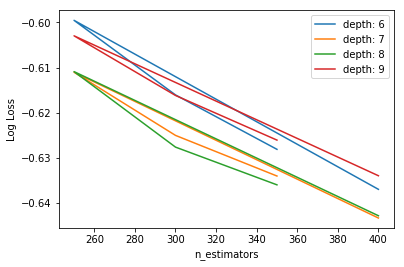

In [53]:
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_max_depth.png')

We can see that the best result was achieved with a n_estimators=250 and max_depth=6, similar to the best values found from the previous two rounds of standalone parameter tuning (n_estimators=250, max_depth=5).

We can plot the relationship between each series of max_depth values for a given n_estimators.

Fewer boosted trees are required with increased tree depth.

Further, we would expect the increase complexity provided by deeper individual trees to result in greater overfitting of the training data which would be exacerbated by having more trees, in turn resulting in a lower cross validation score. We don’t see this here as our trees are not that deep nor do we have too many. Exploring this expectation  is left as an exercise you could explore yourself.

## Creating the model with the best values for Hyper parameters


In [54]:
model = XGBClassifier(max_depth=6, n_estimators=250)

In [55]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [56]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [57]:
print('ROC for the XGBoost model is: ' + str(evaluate(model, X_train,y_train, X_test, y_test)))

ROC for the XGBoost model is: 0.4807692307692308


We need to develop a Nominal Logistic Regression model which will predict whether the house price is HIGH(1) or LOW(-1)

In [58]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [59]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.398741
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:          realSentiment   No. Observations:                  434
Model:                          Logit   Df Residuals:                      420
Method:                           MLE   Df Model:                           13
Date:                Sat, 23 Mar 2019   Pseudo R-squ.:                 0.01780
Time:                        19:07:47   Log-Likelihood:                -173.05
converged:                      False   LL-Null:                       -176.19
                                        LLR p-value:                    0.9357
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
AWSMixed                          38.1080   1.94e+06   1.96e-05      1.000    -3.8e+06     3.8e+06
AWSNe

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
